# Setting up our Notebook

In [1]:
# Things to import

# Standard data, plotting, and mathematical tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scaling
from sklearn.preprocessing import StandardScaler

# MLP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras import utils

# Grid Search
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


# Importing the data

In [2]:
# Importing the data for BTC

dfs=['PCA 24 Hourly BTC.csv', 'PCA 24 Hourly ETH.csv', 'PCA 24 Hourly ADA.csv']

# Multi-Layer Perceptron

## BTC

### Getting the train/test data

In [3]:
# Train and test splitting and scaling
X=pd.read_csv(dfs[0])
y=X['Label']
X=X.drop('Label', axis=1)
X=X.drop('Unnamed: 0', axis=1)

num_classes=3 

# split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=100, shuffle=True)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train,test_size=0.2, random_state=100, shuffle=True)

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_val = utils.to_categorical(y_val, num_classes)


In [4]:
buy=list(y).count(2)
sell=list(y).count(0)
hold=list(y).count(1)
tot=len(y)

print(hold/tot)

0.3486034397005314


### Using Grid Search

In [14]:
# Function to create the model for Keras wrapper to scikit learn

# We will optimize the number of layers, the activation function, the neurons per layer, 
# and the optimizer

def create_mlp_model(activ_function='relu', neurons=50, dropout_rate=0.1, num_layers=1, 
                     optimizer='adam'):
    
    # Create model
    model = keras.Sequential()
    
    if num_layers==1:
        # First layer
        model.add(keras.layers.Dense(neurons, activation=activ_function, input_shape=(20,1)))
        model.add(keras.layers.Dropout(dropout_rate))
        
    if num_layers==2:
        # First layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        
    if num_layers==3:
        # First layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Third layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        
    if num_layers==4:
        # First layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Third layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Fourth layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        
    # Final layer with softmax for classification
    model.add(keras.layers.Dense(3, activation="softmax"))
        
    # Compile model
    model.compile( 
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model



In [15]:
# Creating and compiling the model with a summary

mlp = create_mlp_model()
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20, 50)            100       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 50)            0         
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Optimize the model with grid search

# Grid search parameters
n_epochs_cv = 20 # Number of epochs for our grid search
n_cv = 3 # Number of cross validations

# Create model to feed to our parameter grid search
model = KerasClassifier(build_fn=create_mlp_model, verbose=1)

# Define parameters and values for grid search to check in our model
param_grid = {
     # The features to range over in our model
    'activ_function':['relu', 'tanh', 'sigmoid'],
    'neurons':[50,100,150,200,250,300],
    'dropout_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
    'num_layers':[1, 2, 3, 4],
    'optimizer':['adam', 'RMSProp', 'SGD'],
    # The number of epochs for each model
    'epochs': [n_epochs_cv],
}

# Creating the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)

# Fitting the grid
grid_result = grid.fit(X_train, y_train)

Epoch 1/20
764/764 [==============================] - 4s 3ms/step - loss: 0.5468 - accuracy: 0.7623
Epoch 2/20
764/764 [==============================] - 2s 3ms/step - loss: 0.4869 - accuracy: 0.7898
Epoch 3/20
764/764 [==============================] - 3s 3ms/step - loss: 0.4704 - accuracy: 0.8006
Epoch 4/20
764/764 [==============================] - 2s 3ms/step - loss: 0.4635 - accuracy: 0.8033
Epoch 5/20
764/764 [==============================] - 2s 3ms/step - loss: 0.4570 - accuracy: 0.8070
Epoch 6/20
764/764 [==============================] - 2s 3ms/step - loss: 0.4553 - accuracy: 0.8077
Epoch 7/20
764/764 [==============================] - 2s 3ms/step - loss: 0.4489 - accuracy: 0.8098
Epoch 8/20
764/764 [==============================] - 2s 3ms/step - loss: 0.4438 - accuracy: 0.8102
Epoch 9/20
764/764 [==============================] - 2s 3ms/step - loss: 0.4405 - accuracy: 0.8121
Epoch 10/20
764/764 [==============================] - 2s 2ms/step - loss: 0.4404 - accuracy: 0.8120

In [23]:
print(grid_result.best_params_)

{'activ_function': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'neurons': 250, 'num_layers': 3, 'optimizer': 'adam'}


In [51]:
mlp_model=create_mlp_model(activ_function=grid_result.best_params_['activ_function'], 
                                            neurons=grid_result.best_params_['neurons'], 
                                            dropout_rate=grid_result.best_params_['dropout_rate'],
                                            num_layers=grid_result.best_params_['num_layers'],
                                            optimizer=grid_result.best_params_['optimizer'])

# Fitting the model
history = mlp_model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)

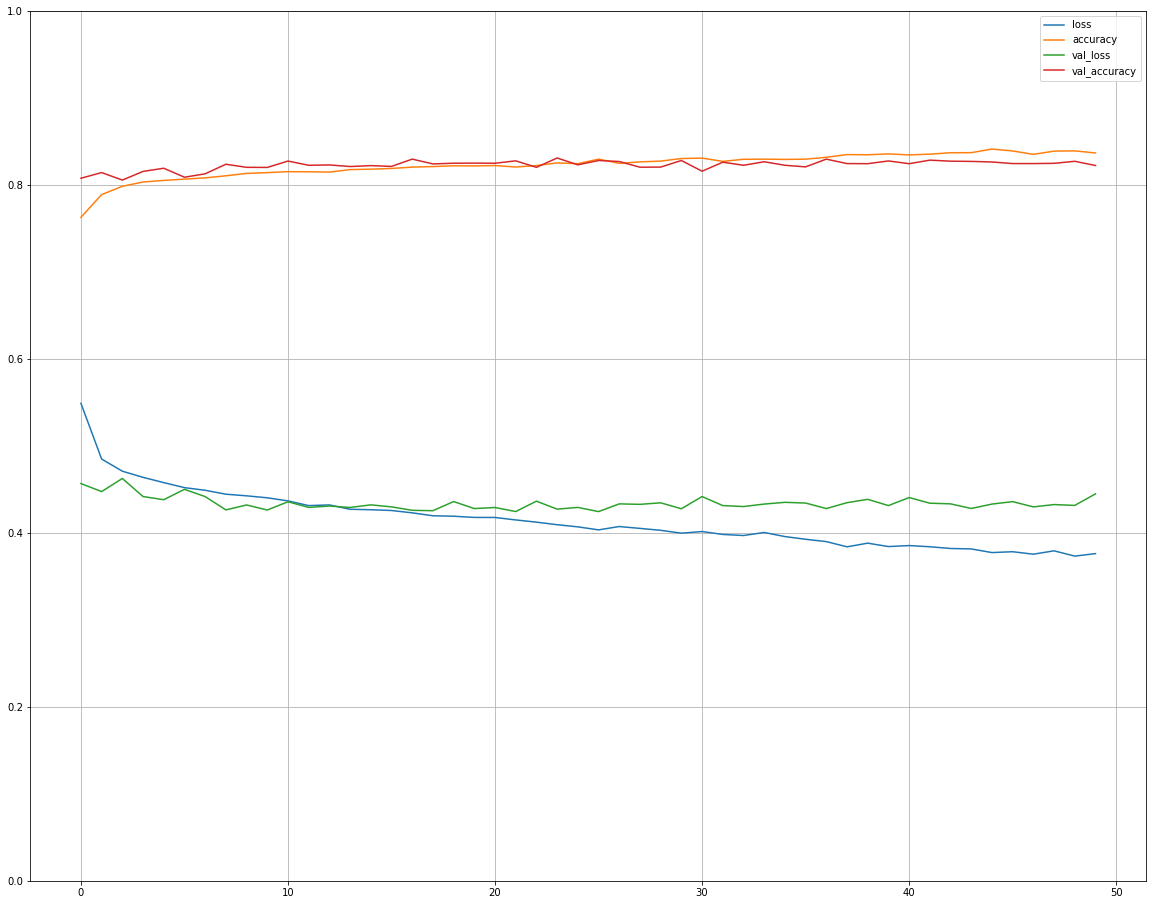

array([[1491,  296,   26],
       [ 211, 1784,  183],
       [  33,  382, 1706]], dtype=int64)

In [54]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Performance
y_pred=mlp_model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred)
# print(accuracy_score(y_test, y_pred))

## Massive Grid Search for Optimizer and parameters

In [5]:
# Function to create the model for Keras wrapper to scikit learn

# We will optimize the number of layers, the activation function, the neurons per layer, 
# and the optimizer (learning rate, decay steps, and decay rate)

def create_mlp_model(activ_function='relu', neurons=50, dropout_rate=0.1, num_layers=1, 
                     optimizer='adam',init_lr=1e-1, decay_steps=5000, decay_rates=0.1):
    
    # Create the model and run through the number of layers
    model = keras.Sequential()
    
    if num_layers==1:
        # First layer
        model.add(keras.layers.Dense(neurons, activation=activ_function, input_shape=(20,1)))
        model.add(keras.layers.Dropout(dropout_rate))
        
    if num_layers==2:
        # First layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        
    if num_layers==3:
        # First layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        # Third layer
        model.add(keras.layers.Dense(neurons, activation=activ_function))
        model.add(keras.layers.Dropout(dropout_rate))
        
        # Final layer with softmax for classification
        model.add(keras.layers.Dense(3, activation="softmax"))
    
    # Running through the optimizers
    if optimizer=='adam':
        # Learning Rate Schedule
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=decay_steps,
        decay_rate=decay_rates)
    
        optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
        
    if optimizer=='RMSprop':
        # Learning Rate Schedule
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=decay_steps,
        decay_rate=decay_rates)
    
        optimizer = keras.optimizers.RMSProp(learning_rate=lr_schedule)
        
    if optimizer=='SGD':
        # Learning Rate Schedule
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=decay_steps,
        decay_rate=decay_rates)
    
        optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
        
    # Compile model
    model.compile( 
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model



In [ ]:
# Optimize the model with grid search

# Grid search parameters
n_epochs_cv = 20 # Number of epochs for our grid search
n_cv = 3 # Number of cross validations

# Create model to feed to our parameter grid search
model = KerasClassifier(build_fn=create_mlp_model, verbose=1)

# Define parameters and values for grid search to check in our model
param_grid = {
    # Model parameters
    'activ_function':['relu', 'tanh', 'sigmoid'],
    'neurons':[50,100,150,200,250,300],
    'dropout_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
    'num_layers':[1, 2, 3],
    'optimizer':['adam', 'RMSProp', 'SGD'],
     # Optimizer parameters
    'init_lr':[1e-1,1e-2,1e-3,1e-4,1e-5],
    'decay_steps':range(1000,10000,1000),
    'decay_rates':[.5,.6,.7,.8,.9],
    # The number of epochs for each model
    'epochs': [n_epochs_cv],
}

# Creating the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)

# Fitting the grid
grid_result = grid.fit(X_train, y_train)

In [ ]:
print(grid_result.best_params_)

In [ ]:
mlp_model=create_mlp_model(activ_function=grid_result.best_params_['activ_function'], 
                                            neurons=grid_result.best_params_['neurons'], 
                                            dropout_rate=grid_result.best_params_['dropout_rate'],
                                            num_layers=grid_result.best_params_['num_layers'],
                                            optimizer=grid_result.best_params_['optimizer'],
                          init_lr=grid_result.best_params_['init_lr'],
                          decay_steps=grid_result.best_params_['decay_steps'],
                          decay_rates=grid_result.best_params_['decay_rates'])

# Fitting the model
history = mlp_model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)

In [ ]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Performance
y_pred=mlp_model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred)
# print(accuracy_score(y_test, y_pred))

## Grid Search for Optimizer

In [28]:
# Creating an MLP model with our parameters from before to now grid search the learning schedule

def create_mlp_model_optimizer(init_lr=1e-1, decay_steps=5000, decay_rates=0.1):
    # Creating the model
    model=keras.models.Sequential([
        keras.layers.Dense(250, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(250, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(250, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation="softmax")])
    
    # Learning Rate Schedule
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=init_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rates)
    
    optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                            metrics=["accuracy"])

In [31]:
# Optimize the model with grid search

# Grid search parameters
n_epochs_cv = 20 # Number of epochs for our grid search
n_cv = 3 # Number of cross validations

# Create model to feed to our parameter grid search
model = KerasClassifier(build_fn=create_mlp_model_optimizer, verbose=1)

# Define parameters and values for grid search to check in our model
param_grid = {
     # The features to range over in our model
    'init_lr':[1e-1,1e-2,1e-3,1e-4,1e-5],
    'decay_steps':range(1000,10000,1000),
    'decay_rates':[.5,.6,.7,.8,.9],
    # The number of epochs for each model
    'epochs': [n_epochs_cv],
}

# Creating the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)

# Fitting the grid
grid_result = grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(grid_result.best_params_)

In [ ]:
# Creating and compiling a model with the best parameters

# Creating the model
model=keras.models.Sequential([
keras.layers.Dense(250, activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(250, activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(250, activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(3, activation="softmax")])

# Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate=init_lr,
decay_steps=decay_steps,
decay_rate=decay_rates)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                            metrics=["accuracy"])

# Fitting the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)

In [ ]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # Note, I need this for our accuracy and confusion matrix.


# Score
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

### Running through optimizers, decay steps, and decay rates

In [9]:
# Learning Schedule Loop

init_lr=[1e-1,1e-2,1e-3,1e-4,1e-5]
decay_steps=range(1000,10000,1000)
decay_rates=[.5,.6,.7,.8,.9]

model_hyps=[]
perf=[]

for lr in init_lr:
    for dec_step in decay_steps:
        for dec_rate in decay_rates:
            
            model_hyps.append([lr, dec_step, dec_rate])
            
            # Creating the model
            model = keras.models.Sequential([
            keras.layers.Dense(150, activation="sigmoid"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(150, activation="sigmoid"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(150, activation="sigmoid"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(3, activation="softmax")
            ])

            # Learning Rate Schedule
            lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=lr,
                decay_steps=dec_step,
                decay_rate=dec_rate)
            optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8297201991081238, 0.825546383857727] [0.01, 6000, 0.5]


Optimizer Loop Results:

The best is learning_rate=0.01, decay_steps=6000, and decay_rate=0.5

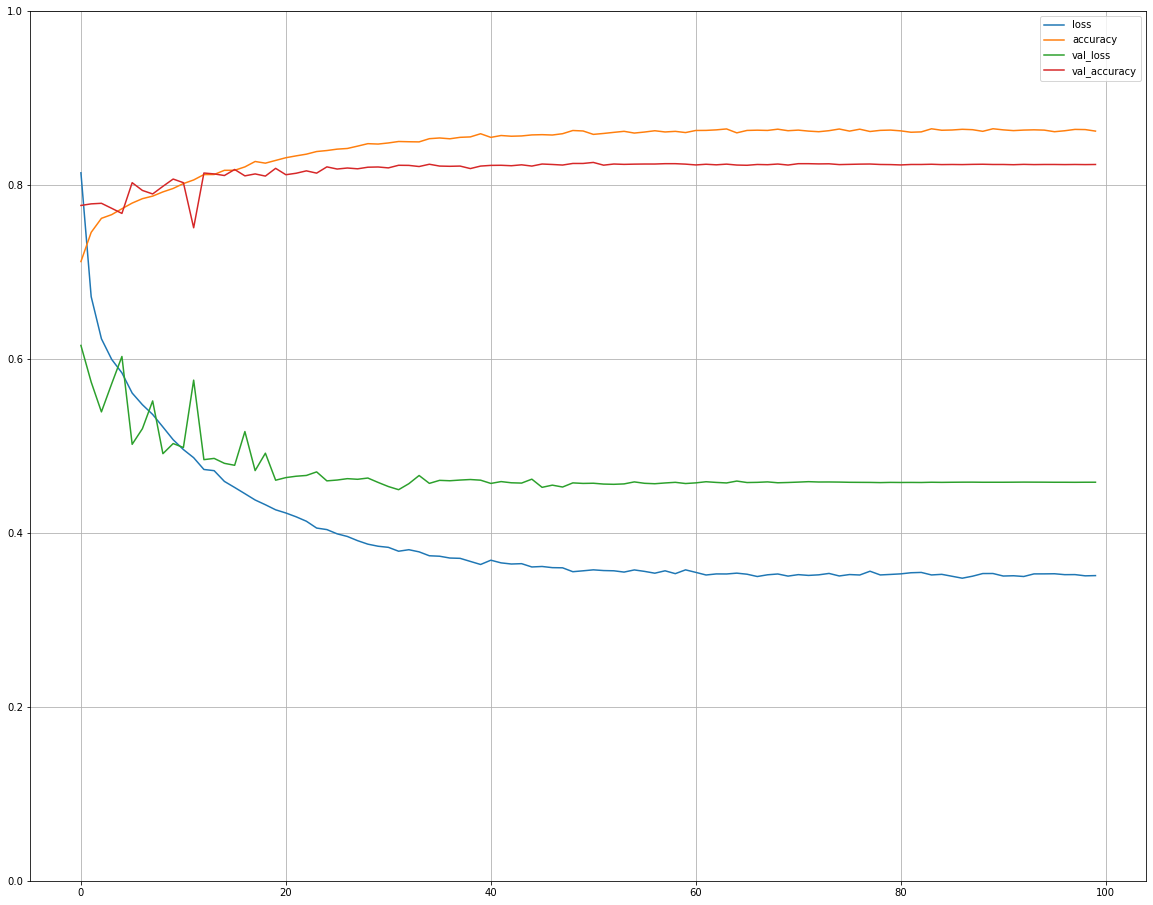

In [39]:
# Our MLP Model made with the best architecture and optimizer

# Creating the model
model = keras.models.Sequential([
keras.layers.Dense(300, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(300, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(300, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(3, activation="softmax")
])

# Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=6000,
    decay_rate=0.5)
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Fitting the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val,y_val), verbose=0)

# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [40]:
y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # Note, I need this for our accuracy and confusion matrix.


# Score
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8231348167539267


array([[1523,  251,   39],
       [ 219, 1715,  244],
       [  32,  296, 1793]], dtype=int64)

After cycling through Adam, RMSprop, and SGD, we settle on RMSprop as the best optimizer.

In [41]:
# Saving the model

model.save('Models/MLP BTC H.h5')

## ETH

### Getting the train/test data

In [42]:
# Train and test splitting and scaling
X=pd.read_csv(dfs[1])
y=X['Label']
X=X.drop('Label', axis=1)
X=X.drop('Unnamed: 0', axis=1)

# split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=100, shuffle=True)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train,test_size=0.2, random_state=100, shuffle=True)
print(len(X_train))

24448


In [43]:
buy=list(y).count(2)
sell=list(y).count(0)
hold=list(y).count(1)
tot=len(y)

print(buy/tot)

0.3986021308342714


### Running through three MLP architectures with activation function, nodes per dense layer, and dropout

In [15]:
# MLP Model

# Model hyperparameters
activ_functions=['relu', 'tanh']
nodes=range(50,350,50)
dropouts=[.1,.2,.3,.4,.5]
epochs=20

model_hyps=[]
perf=[]

for activ in activ_functions:
    for node in nodes:
        for dropout in dropouts:
            
            model_hyps.append([activ,node,dropout])
            
            # Model Structure
            model=keras.models.Sequential([
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(3, activation="softmax")])
            
            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam',
                            metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=epochs, 
                                    validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8086960315704346, 0.7991100549697876] ['relu', 300, 0.1]


In [16]:
# MLP Model

# Model hyperparameters
activ_functions=['relu', 'tanh']
nodes=range(50,350,50)
dropouts=[.1,.2,.3,.4,.5]
epochs=20

model_hyps=[]
perf=[]

for activ in activ_functions:
    for node in nodes:
        for dropout in dropouts:
            
            model_hyps.append([activ,node,dropout])
            
            # Model Structure
            model=keras.models.Sequential([
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(3, activation="softmax")])
            
            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam',
                            metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=epochs, 
                                    validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8382280468940735, 0.8055228590965271] ['relu', 300, 0.1]


In [17]:
# MLP Model

# Model hyperparameters
activ_functions=['relu', 'tanh', 'sigmoid']
nodes=range(50,350,50)
dropouts=[.1,.2,.3,.4,.5]
epochs=20

model_hyps=[]
perf=[]

for activ in activ_functions:
    for node in nodes:
        for dropout in dropouts:
            
            model_hyps.append([activ,node,dropout])
            
            # Model Structure
            model=keras.models.Sequential([
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(3, activation="softmax")])
            
            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam',
                            metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=epochs, 
                                    validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.839577853679657, 0.8042141199111938] ['tanh', 300, 0.1]


Best architecture:
    
Tanh with 3 layers, 300 neurons each, and 0.1 dropout

In [18]:
# Our MLP Model based on the best architecture

# Creating the model
model = keras.models.Sequential([
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(3, activation="softmax")
])

# Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Fitting the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val,y_val), verbose=0)

9/13: Despite the best model from the loop being with 300 neurons, I am getting a smoother graph with 100 neurons. Also, the longer I am training it, the better. 50 isn't enough to see where it is going

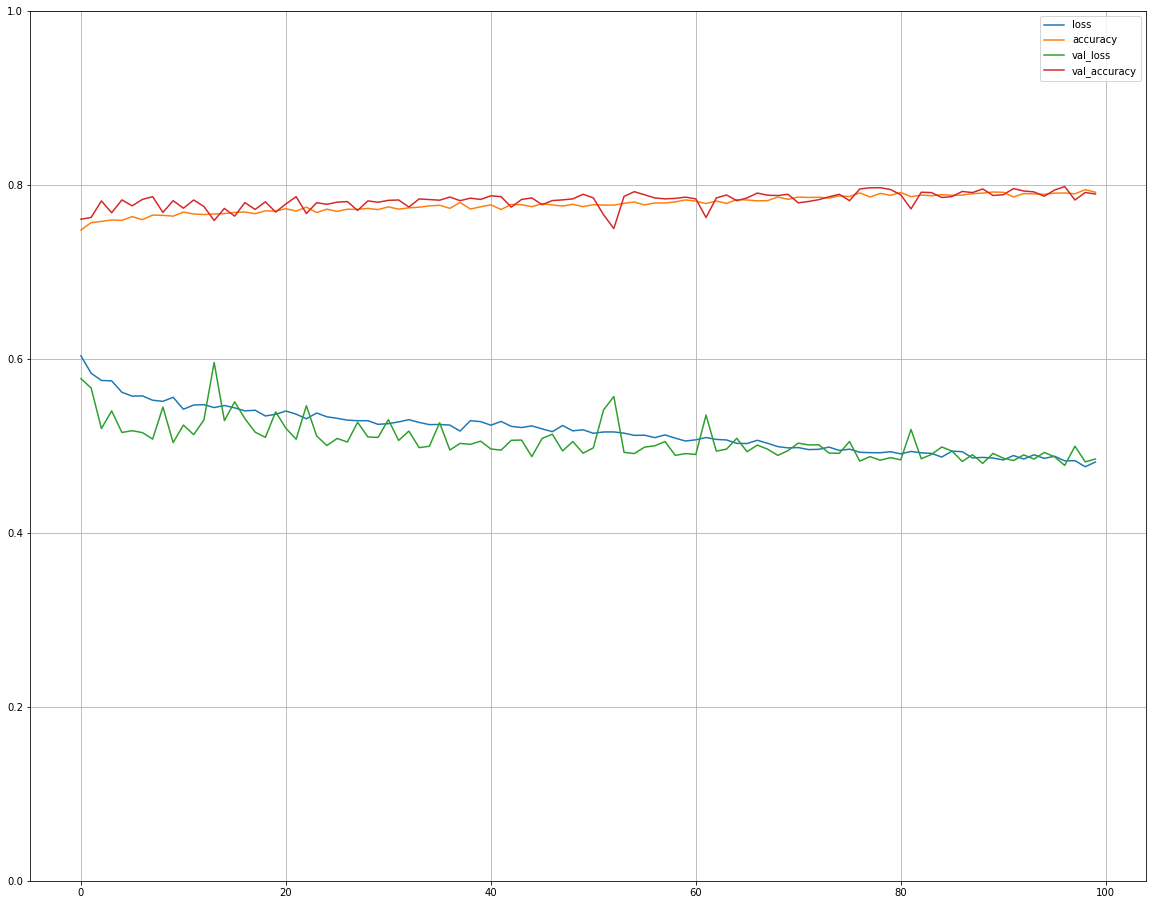

In [19]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Running through optimizers, decay steps, and decay rates

In [20]:
# Learning Schedule Loop

init_lr=[1e-1,1e-2,1e-3,1e-4,1e-5]
decay_steps=range(1000,10000,1000)
decay_rates=[.5,.6,.7,.8,.9]

model_hyps=[]
perf=[]

for lr in init_lr:
    for dec_step in decay_steps:
        for dec_rate in decay_rates:
            
            model_hyps.append([lr, dec_step, dec_rate])
            
            # Creating the model
            model = keras.models.Sequential([
            keras.layers.Dense(100, activation="tanh"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(100, activation="tanh"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(100, activation="tanh"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(3, activation="softmax")
            ])

            # Learning Rate Schedule
            lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=lr,
                decay_steps=dec_step,
                decay_rate=dec_rate)
            optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8183082342147827, 0.8031671047210693] [0.01, 3000, 0.6]


The best optimization had a learning rate 0.001, 6000 steps, and 0.7 decay rate

In [44]:
# Our MLP Model based on the best architecture

# Creating the model
model = keras.models.Sequential([
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(3, activation="softmax")
])

# Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=3000,
    decay_rate=0.6)
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Fitting the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)

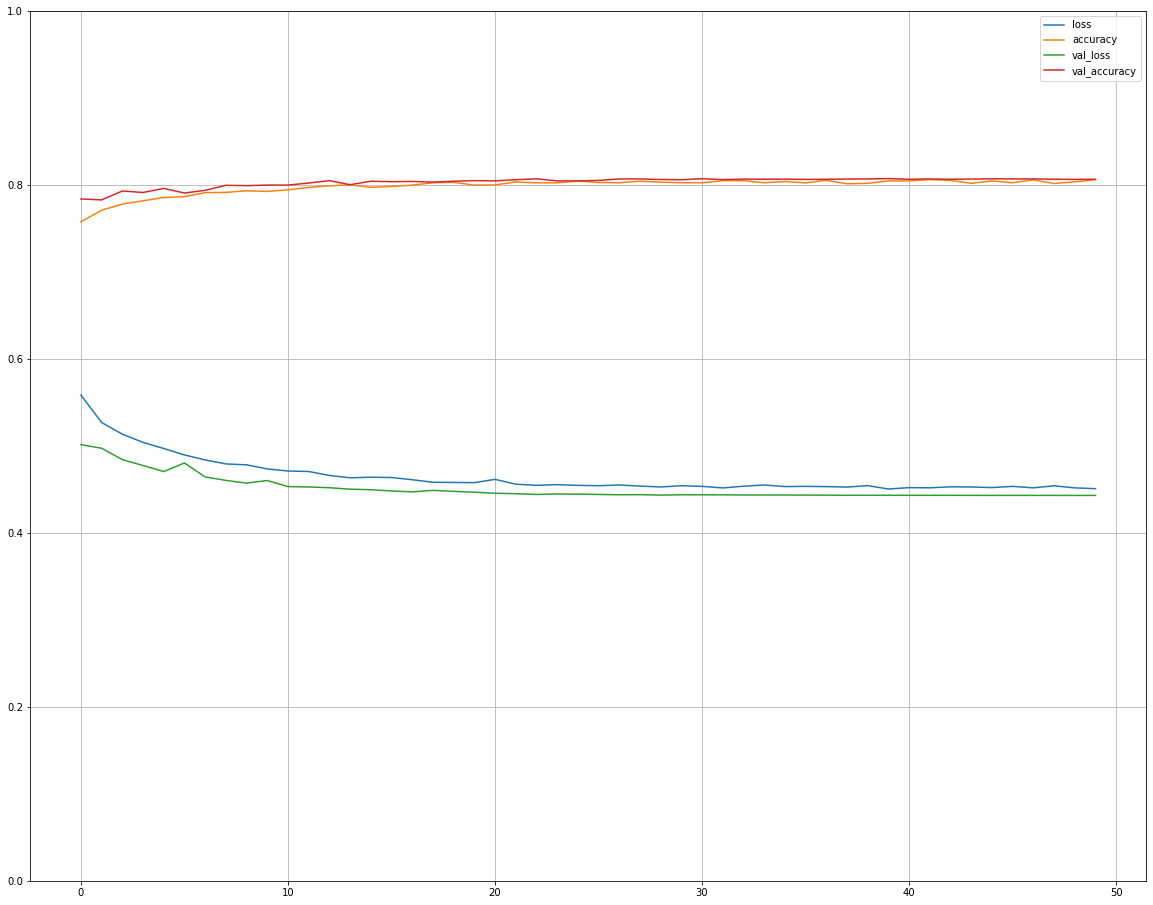

In [45]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [46]:
y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # Note, I need this for our accuracy and confusion matrix.


# Score
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8107002617801047


array([[1822,  249,   54],
       [ 254, 1068,  296],
       [  42,  262, 2065]], dtype=int64)

After cycling through Adam, RMSprop, and SGD, we settle on RMSprop as the besst optimizer.

In [47]:
# Saving the model

model.save('Models/MLP ETH H.h5')

## ADA

### Getting the training/test data

In [48]:
# Train and test splitting and scaling
X=pd.read_csv(dfs[2])
y=X['Label']
X=X.drop('Label', axis=1)
X=X.drop('Unnamed: 0', axis=1)

# split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=100, shuffle=True)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train,test_size=0.2, random_state=100, shuffle=True)
print(len(X_train))

6155


In [49]:
buy=list(y).count(2)
sell=list(y).count(0)
hold=list(y).count(1)
tot=len(y)

print(sell/tot)

0.38760657101268453


### Running through three MLP architectures with activation function, nodes per dense layer, and dropout

In [27]:
# MLP Model

# Model hyperparameters
activ_functions=['relu', 'tanh']
nodes=range(50,350,50)
dropouts=[.1,.2,.3,.4,.5]
epochs=20

model_hyps=[]
perf=[]

for activ in activ_functions:
    for node in nodes:
        for dropout in dropouts:
            
            model_hyps.append([activ,node,dropout])
            
            # Model Structure
            model=keras.models.Sequential([
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(3, activation="softmax")])
            
            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam',
                            metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=epochs, 
                                    validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8237205743789673, 0.8056132793426514] ['relu', 250, 0.1]


In [28]:
# MLP Model

# Model hyperparameters
activ_functions=['relu', 'tanh']
nodes=range(50,350,50)
dropouts=[.1,.2,.3,.4,.5]
epochs=20

model_hyps=[]
perf=[]

for activ in activ_functions:
    for node in nodes:
        for dropout in dropouts:
            
            model_hyps.append([activ,node,dropout])
            
            # Model Structure
            model=keras.models.Sequential([
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(3, activation="softmax")])
            
            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam',
                            metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=epochs, 
                                    validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8607636094093323, 0.7983368039131165] ['relu', 300, 0.1]


In [29]:
# MLP Model

# Model hyperparameters
activ_functions=['relu', 'tanh', 'sigmoid']
nodes=range(50,350,50)
dropouts=[.1,.2,.3,.4,.5]
epochs=20

model_hyps=[]
perf=[]

for activ in activ_functions:
    for node in nodes:
        for dropout in dropouts:
            
            model_hyps.append([activ,node,dropout])
            
            # Model Structure
            model=keras.models.Sequential([
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(node, activation=activ),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(3, activation="softmax")])
            
            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam',
                            metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=epochs, 
                                    validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8732737898826599, 0.80509352684021] ['relu', 300, 0.1]


The best architecture has a relu activation function, 300 neurons per layer, and a dropout of 0.1

In [30]:
# Our MLP Model based on the best architecture

# Creating the model
model = keras.models.Sequential([
keras.layers.Dense(300, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(300, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(300, activation="tanh"),
keras.layers.Dropout(.1),
keras.layers.Dense(3, activation="softmax")
])

# Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=7000,
    decay_rate=0.5)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Fitting the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), verbose=0)

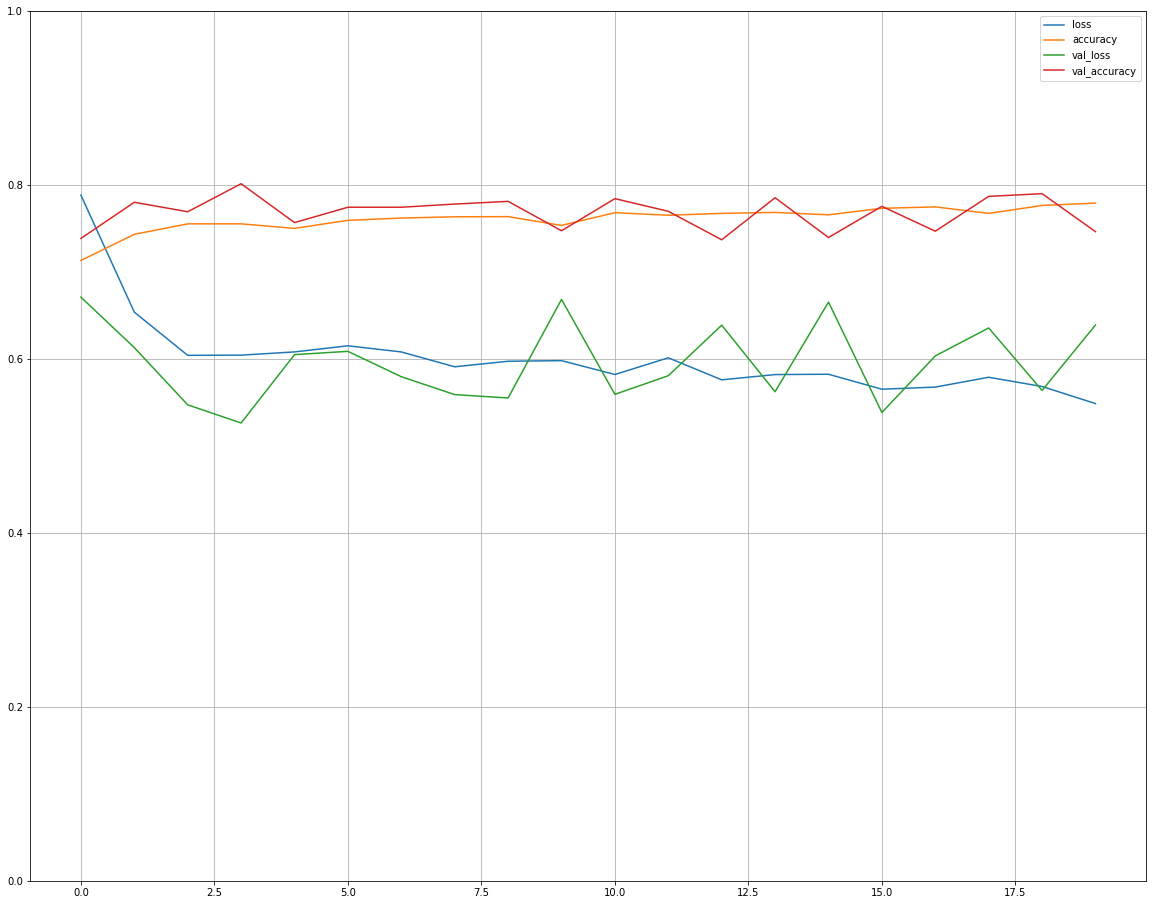

In [31]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Running through optimizers, decay steps, and decay rates

In [32]:
# Learning Schedule Loop

init_lr=[1e-1,1e-2,1e-3,1e-4,1e-5]
decay_steps=range(1000,10000,1000)
decay_rates=[.5,.6,.7,.8,.9]

model_hyps=[]
perf=[]

for lr in init_lr:
    for dec_step in decay_steps:
        for dec_rate in decay_rates:
            
            model_hyps.append([lr, dec_step, dec_rate])
            
            # Creating the model
            model = keras.models.Sequential([
            keras.layers.Dense(300, activation="tanh"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(300, activation="tanh"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(300, activation="tanh"),
            keras.layers.Dropout(.1),
            keras.layers.Dense(3, activation="softmax")
            ])

            # Learning Rate Schedule
            lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=lr,
                decay_steps=dec_step,
                decay_rate=dec_rate)
            optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

            # Compiling the model
            model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

            # Fitting the model
            history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), verbose=0)

            # Performance

            history.history.keys()
            accuracy=list((history.history.values()))[1]
            val_accuracy=list((history.history.values()))[3]
            
            perf.append([accuracy[-1],val_accuracy[-1]])
print(max(perf), model_hyps[perf.index(max(perf))])

[0.8776604533195496, 0.7972972989082336] [0.001, 4000, 0.8]


The best optimizer has 0.001 learning rate, 4000 steps, and 0.8 decay rate

In [52]:
# Our MLP Model based on the best optimizer

# Creating the model
model = keras.models.Sequential([
keras.layers.Dense(300, activation="relu"),
keras.layers.Dropout(.1),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dropout(.1),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dropout(.1),
keras.layers.Dense(3, activation="softmax")
])

# Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=4000,
    decay_rate=0.8)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Fitting the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val,y_val), verbose=0)

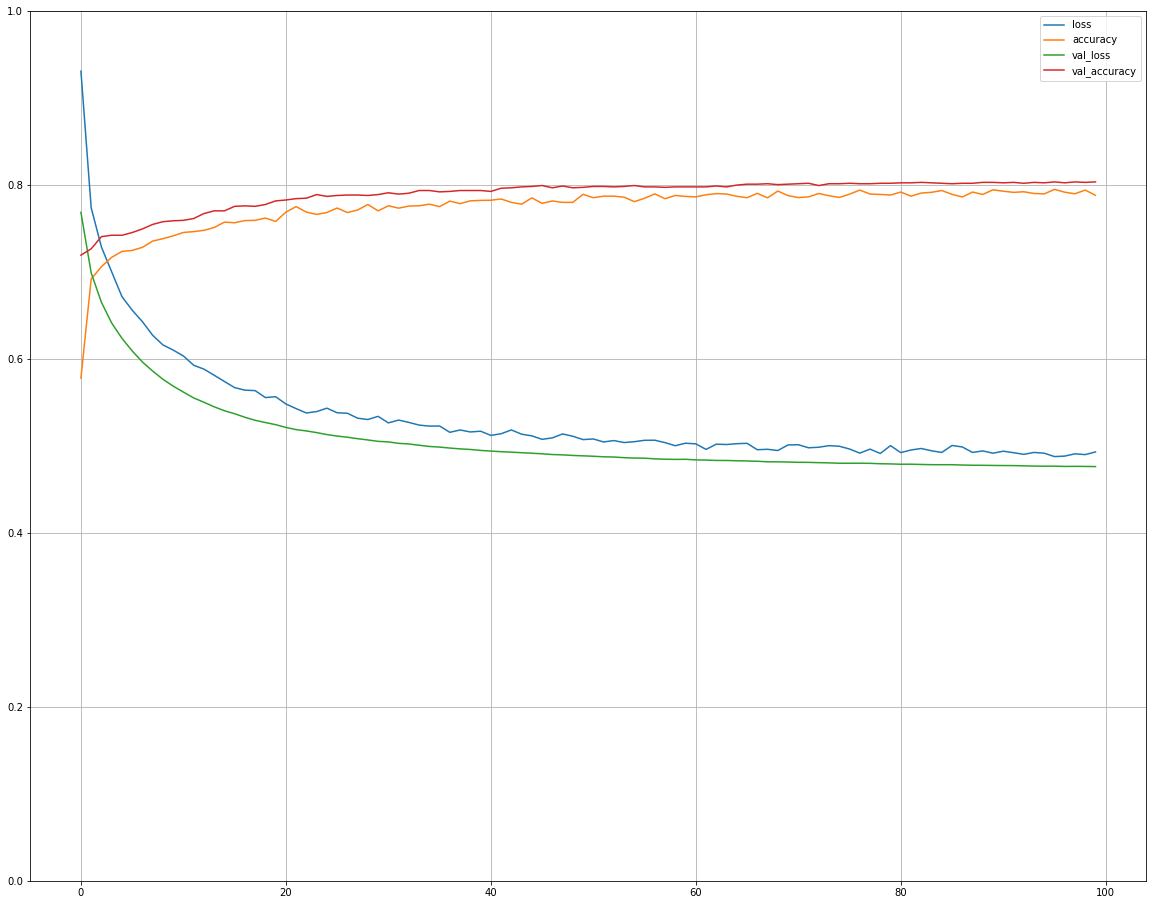

In [53]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [54]:
y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # Note, I need this for our accuracy and confusion matrix.


# Score
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8011695906432749


array([[528,  43,  34],
       [ 75, 108,  72],
       [ 42,  40, 597]], dtype=int64)

After cycling through Adam, RMSprop and SGD, we find that RMSprop and Adam cause the validation metrics to diverge after enough epochs. Though the accuracy and loss are better, they represent overfitting, so we will go with SGD.

In [55]:
# Saving the model

model.save('Models/MLP ADA H.h5')